# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
#Files are in the same directory as the notebook
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = 39209 #X_train.shape[0]

# TODO: Number of testing examples.
n_test = 12630  #X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32,3) #X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43  #len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
#Get label names
import csv
with open("signnames.csv", "r") as csvfile:
    label_names_file = csv.reader(csvfile)
    next(label_names_file, None)
    label_names = [x[1] for x in label_names_file]  
    #print(label_names)

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

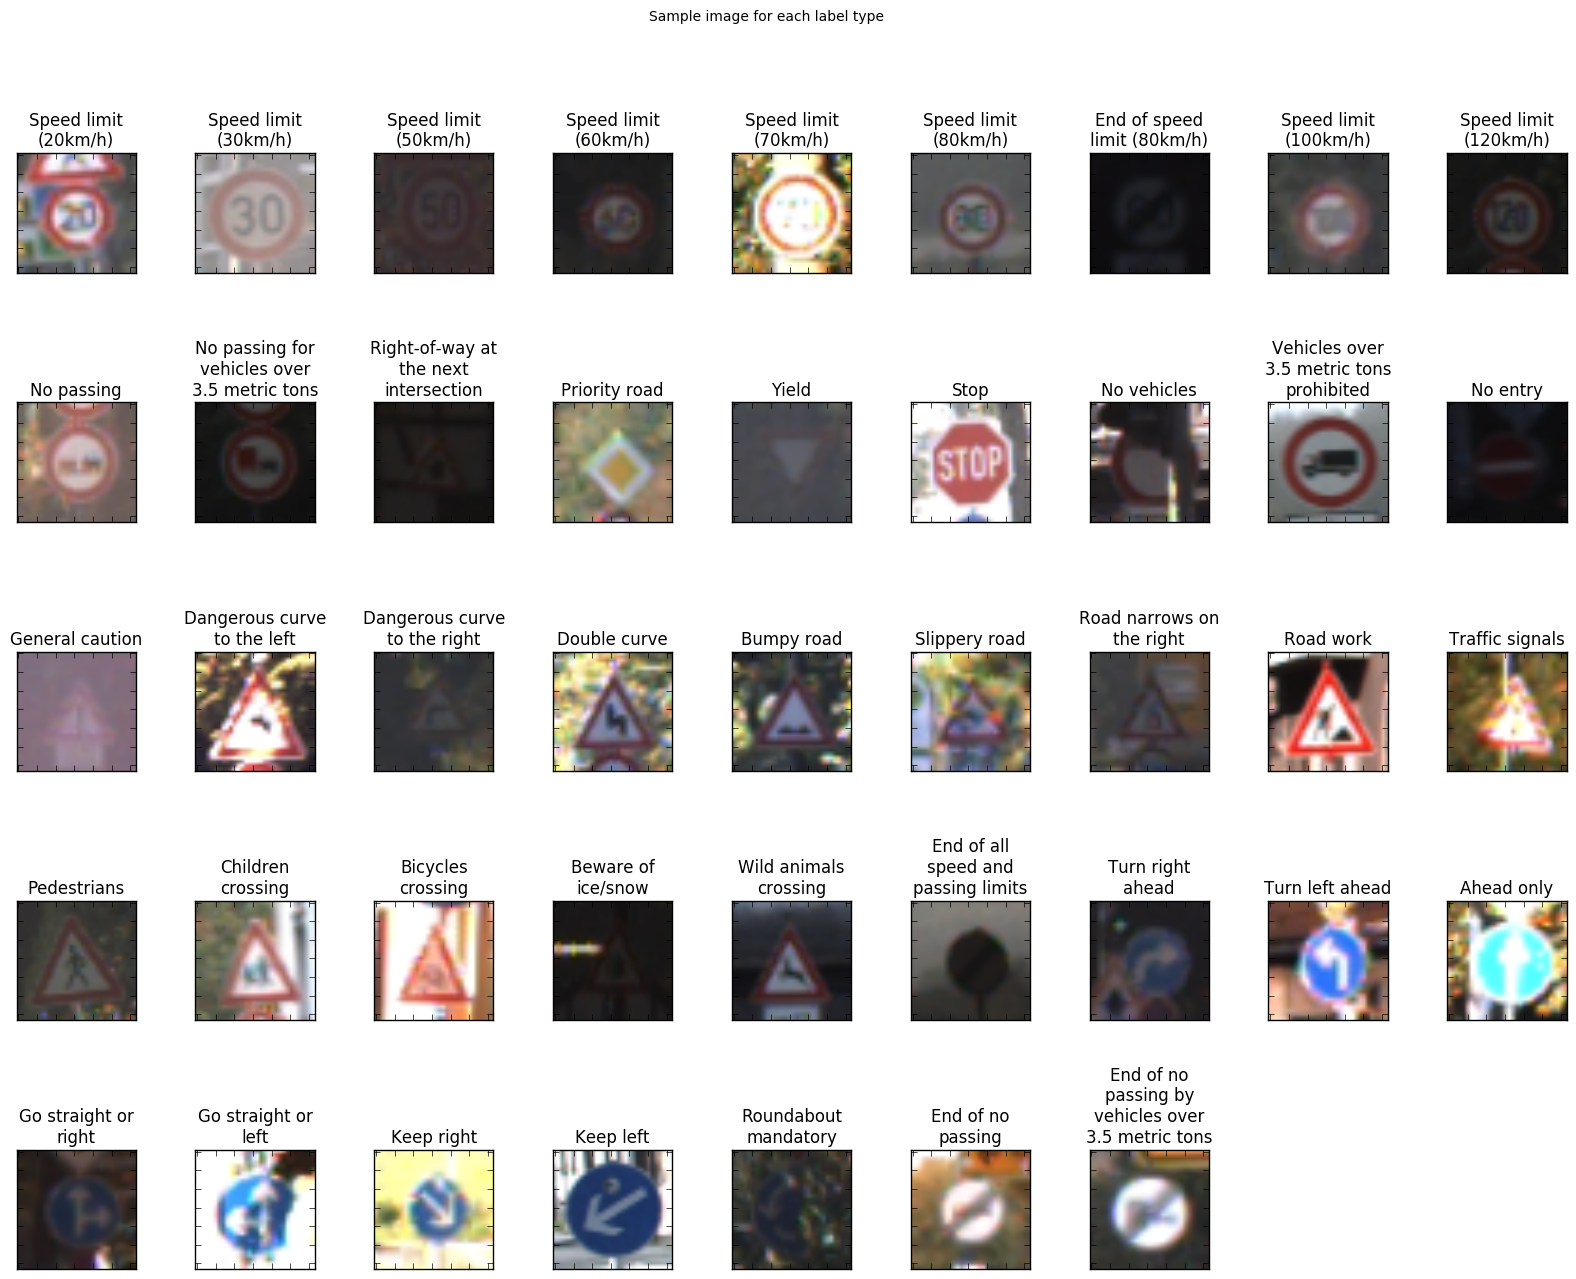

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

#Visualise the type of training data...we will plot the images in a grid
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
from collections import Counter
l_counter = Counter(y_train)

plt.figure(figsize=(20,15))

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(5, 9, hspace = 0.5, wspace=0.5)

from textwrap import wrap

for i in range(n_classes):
    ax = plt.subplot(gs[i])
    ax.tick_params('off')
    ax.imshow(X_train[s])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    title = "\n".join(wrap(label_names[i], 15))
    ax.set_title(title)
    #plt.axis('off')
plt.suptitle("Sample image for each label type")  
plt.show()


In [ ]:
#Visualize amount of training data for each label type

#Sort the counter by most_common occurences
label_counter = l_counter.most_common()
labels, label_counts = zip(*label_counter)

indices = np.arange(n_classes)
width = 1

plt.figure(figsize=(20,10))
plt.bar(indices, label_counts, width, tick_label = range(n_classes))
plt.xticks(indices + width*0.5, labels)
plt.ylabel("Counts per Traffic Sign type")
plt.xlabel("Traffic Sign Label number")
plt.title("Traffic Sign Counts (decreasing order)")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

normalized = False
def normalize(image_data):
    """
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    max_val = 255
    min_val = 0
    
    max_new = -0.5
    min_new = 0.5
    norm_val = min_new + (image_data * (max_new - min_new)/(max_val - min_val))
    return norm_val


if not normalized:
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    normalized = True #Set flag to prevent re-normalization


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1. The only pre-processing done was normalization. The data was normalised between 0 and 1 for processing.
2. An initial attempt to convert the 3 channel imput to 1 channel (grayscale or Y from YUV) was made, but then I read about Color-Transformer layers and decided to use that in the network.

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
x_trn, x_val, y_trn, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13)
'''x_trn = x_trn[0:2000]
y_trn = y_trn[0:2000]
x_val = x_val[0:100]
y_val = y_val[0:100]'''

'x_trn = x_trn[0:2000]\ny_trn = y_trn[0:2000]\nx_val = x_val[0:100]\ny_val = y_val[0:100]'

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
1. The given training data was split into Training and Validation dataset with an 80/20 split. I used this value after seeing a few mentions in literature. Most papers talked about using a Validation set about 5%-20% of Training data
2. For Testing, I used the Test data provided in the repo. I also took a few pictures in different orientations of some traffic signs. I also used a few images I found online.
3. I spent some time coming up with a random affine transformer to generate more data, but did not use it in this project because I wanted to spend more time playing with the networks and training was taking a long time.


In [7]:
#del sess
#del sess
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [17]:
tf.reset_default_graph()
print(len(tf.get_collection(tf.GraphKeys.VARIABLES)))

0


In [18]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#Since the task is a classification task, we can develop on the LeNet model


def TrafficSignClassifier(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x3. (Color Space Transformer)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(1,1,3,3), mean= mu, stddev= sigma), name="W1",\
                          collections=[tf.GraphKeys.WEIGHTS,tf.GraphKeys.VARIABLES])
    conv1_b = tf.Variable(tf.zeros(shape=(3)), name="b1")
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding="VALID") + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Convolutional. Input = 32x32x3. Output = 30x30x18.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3,3,3,18), mean= mu, stddev= sigma), name="W2", \
                          collections=[tf.GraphKeys.WEIGHTS,tf.GraphKeys.VARIABLES])
    conv2_b = tf.Variable(tf.zeros(shape=(18)), name="b2")
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding="VALID") + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 30x30x18. Output = 15x15x18.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")

    # Layer 2: Convolutional. Output = 11x11x36.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5,5,18,36), mean= mu, stddev= sigma), name="W3", \
                          collections=[tf.GraphKeys.WEIGHTS,tf.GraphKeys.VARIABLES])
    conv3_b = tf.Variable(tf.zeros(shape=(36)), name="b3")
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1,1,1,1], padding="VALID") + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)

    # TODO: Pooling. Input = 11x11x36. Output = 5x5x36.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")

    # TODO: Flatten. Input = 5x5x36. Output = 900.
    fc0 = flatten(conv3)
    
    # TODO: Layer 3: Fully Connected. Input = 900. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(900, 120), mean= mu, stddev= sigma), name="fc_w1",\
                        collections=[tf.GraphKeys.WEIGHTS,tf.GraphKeys.VARIABLES])
    fc1_b = tf.Variable(tf.zeros(shape=(120)),name="fc_b1")
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean= mu, stddev= sigma),name="fc_w2",\
                        collections=[tf.GraphKeys.WEIGHTS,tf.GraphKeys.VARIABLES])
    fc2_b = tf.Variable(tf.zeros(shape=(84)), name="fc_b2")
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean= mu, stddev= sigma),name="fc_w3",\
                        collections=[tf.GraphKeys.WEIGHTS,tf.GraphKeys.VARIABLES])
    fc3_b = tf.Variable(tf.zeros(shape=(n_classes)), name="fc_b3")
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, (None))

one_hot_y = tf.one_hot(y, n_classes)

0


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I first started with a model very similar to LeNet but for 3 channel images. I also added a color transformer layer to the network. The model was very fast to train and I got Training and Validation Accuracies close to 99%. The Test Accuracy was not too good (~89%). Since this was a small network, the training speed was really fast and I was able to fine-tune hyperparameters (learning rate = 0.001, epochs = 75, batch_size = 256)

I then tried to create a larger (and wider) network. This network has 3 Convolutional layers but with more filters, (3, 18 and 36) and 3 Fully Connected layers. each Conv layer is followed by a ReLU layer and Max Pool layer. each FC layer has ReLU and Dropout (50% drop) after it,
I have also used L2 regularization for the weights.

I tried more deeper networks but they need a lot more time to train. I intend to create more complex models once I get my GPU up and running.

In [21]:
##### Train your model here.
### Feel free to use as many code cells as needed.
logits = TrafficSignClassifier(x, keep_prob)
probability = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
regularization = tf.contrib.layers.apply_regularization(tf.contrib.layers.l2_regularizer(0.01))
loss_operation = tf.reduce_mean(cross_entropy + regularization)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.003)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

topk_accuracy = tf.nn.in_top_k(logits, y, 5)

print(len(tf.get_collection(tf.GraphKeys.VARIABLES)))
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#calculate softmax prob
def calculateProb(X_data):
    probabilities = []
    num_examples = len(X_data)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        probabilities.append(sess.run(prob, feed_dict={x: batch_x}))
    return probabilities

#print(len(tf.get_collection(tf.GraphKeys.VARIABLES)))

12
12
12
12
12
12
12
12


In [22]:
import time
EPOCHS = 400
BATCH_SIZE = 256

saver = tf.train.Saver()

do_training = True
if do_training :
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        num_examples = len(x_trn)

        print("Training...")
        print()
        for i in range(EPOCHS):
            start = time.time()
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = x_trn[offset:end], y_trn[offset:end]
                #sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
                sess.run(logits, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
                end = time.time()
            print("EPOCH {}... {} seconds".format(i, end - start))
            if (i % 10 == 0): #Print Every 10 epochs
                validation_accuracy = evaluate(x_val, y_val)
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print()

        saver.save(sess, 'TrafficSignClassifier')
        print("Model saved")

Training...

EPOCH 0... 14.476756572723389 seconds
Validation Accuracy = 0.014

Model saved


In [23]:
with tf.Session() as sess:
    saver.restore(sess, "./TrafficSignClassifier3")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.907


In [40]:
#top K accuracy...Using top 3
with tf.Session() as sess:
    saver.restore(sess, "./TrafficSignClassifier3")
    topk = sess.run(tf.nn.in_top_k(logits, y_test[0:100], 3), feed_dict={x:X_test[0:100],keep_prob:1.0})
    topk_accuracy = np.average(topk)
    print("Test Accuracy = {:.3f}".format(topk_accuracy))

Test Accuracy = 0.950


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


#### **Answer:**
1. I used an Adam Optimizer because it mitigates issues with random weight initialization of the model and also shows fast learning. I started of with 0.001 as learning rate (taking cue from some lectures and previous projects).
2. The batch size of 256 was chosen at random. I did not see any change in the over all accuracy with different batches. 256 seemed to not give any speed issues, so I went with it. If I add augmentations, I might reduce the batch size.
2. For the smaller model, the epoch number did not really play much role. After about 75 epochs, I stopped seeing any improvement in Loss.
3. For the larger model, a 400 epoch training took close to 1.5 days. I believe that it needs far more training as I see accuracy dropping still. Will continue working on that.
 4. The Test Accuracy is close to the Validation accuracy, which means the network is doing a good job by **not overfitting**.
 5. Test Accuracy ~ 90%, Validation Accuracy ~ 94%
 6. Test Accuracy (Top 3) ~ 97%

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
1. 


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [45]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
# Visualizations will be shown in the notebook.

%matplotlib inline
from collections import Counter
l_counter = Counter(y_train)

plt.figure(figsize=(20, 10))

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 4, hspace = 0.5, wspace=0.5)

from textwrap import wrap

s = 0
for file in glob('ExtraImages/*.png'):
    
for i in range(n_classes):
    ax = plt.subplot(gs[i])
    ax.tick_params('off')
    ax.imshow(X_train[s])
    s += l_counter[i]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    title = "\n".join(wrap(label_names[i], 15))
    ax.set_title(title)
    #plt.axis('off')
plt.suptitle("Sample image for each label type")  
plt.show()


SyntaxError: invalid syntax (<ipython-input-45-69dba013e888>, line 18)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    #print("Restoring existing model")
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    l = sess.run(probability, feed_dict={x:X_test[0:2], keep_prob: 1})
    top_k = sess.run(tf.nn.top_k(l, 3))
    
    
    print(top_k[0])
    
    for i in range(2):
        plt.imshow(X_test[i])
        print("Correct label:\n{}\n".format(label_names[y_test[i]]))
        print("Predicted labels:")
        for prob, ind in zip(top_k.values[i], top_k.indices[i]):
            print(label_names[ind], ": {:.5f} ".format(prob))
        plt.show()
    


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.